In [1]:
#run pip install fancyimpute
#launch spark 
import pyspark
import dxpy
import dxdata
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats
from fancyimpute import IterativeImputer
from scipy.stats import chi2_contingency
sc = pyspark.SparkContext()
spark = pyspark.sql.SparkSession(sc)

In [2]:
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)


In [3]:
#prep database 
dispensed_database_name = dxpy.find_one_data_object(classname="database", name="app*", folder="/", name_mode="glob", describe=True)["describe"]["name"]
dispensed_dataset_id = dxpy.find_one_data_object(typename="Dataset", name="app*.dataset", folder="/", name_mode="glob")["id"]

In [4]:
#prep dataset
dataset = dxdata.load_dataset(id=dispensed_dataset_id)
participant = dataset["participant"]

In [5]:
#pull all relevant columns
field_names = ['eid', 'p31','p134_i0', 'p130840', 'p130836', 'p130842' , 'p20510', 'p20400', 'p40005_i0', 'p130898', 'p130900', 'p130902', 'p21000_i0', 'p21003_i0', 'p131298', 'p131286', 'p131294', 'p130814', 'p130706', 'p130708', 'p53_i0', 'p130892',  'p130894', 'p130896', 'p130838', 'p131056', 'p131058', 'p131180',  'p131360', 'p131362', 'p131364', 'p131366', 'p131368', 'p131370', 'p131372', 'p131374', 'p131376',  'p131378',  'p90012', 'p90185', 'p90187', 'p90017', 'p90016', 'p90051',  'p90010', 'p90011', 'p131354', 'p131306', 'p40046_i0', 'p40047_i0',   'p40048_i0',  'p40049_i0', 'p40049_i0', 'p90027', 'p90028', 'p90029', 'p90030', 'p90031', 'p90032', 'p90033', 'p90034', 'p90035', 'p90036', 'p90037', 'p90038', 'p90039', 'p90040', 'p90041', 'p90042', 'p90043', 'p90044', 'p90045', 'p90010', 'p90011', 'p90046', 'p90047', 'p90048', 'p90049', 'p90050', 'p90051', 'p40030_i0',  'p40031_i0', 'p40032_i0', 'p40033_i0']
#check that rename worked
df = participant.retrieve_fields(names=field_names, engine=dxdata.connect())

In [6]:
#create pandas dataframe
pdf = df.toPandas()

/cluster/spark/python/pyspark/sql/pandas/conversion.py:194: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/cluster/spark/python/pyspark/sql/pandas/conversion.py:194: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [7]:
#rename columns
pdf_rename = pdf.rename(columns={'eid': 'pID', 'p130840':'f02_date', 'p130836':'f00_date', 'p130842': 'f03_date' ,   'p20400':'online_dep_date', 'p90010': 'acc_start_date',  'p90011': 'acc_end_date', 'p31': 'male', 'p21000_i0': 'ethnicity',  'p1558_i0': 'alc_freq', 'p1558_i1': 'alc_freq_1', 'p20002_i0': 'sr_illness', 'p20002_i1': 'sr_illness_1', 'p21003_i0': 'age_i0', 'p21003_i1': 'age_i1',  'p131298': 'i21_date', 'p131298': 'i21_date', 'p131286': 'i10_date', 'p131294': 'i15_date', 'p130814': 'e78_date', 'p130706': 'e10_date', 'p130708': 'e11_date', 'p53_i0': 'date_i0', 'p53_i1': 'date_i1', 'p130892': 'f31_date',  'p130894': 'f32_date', 'p130896': 'f33_date',  'p130838': 'f01_date', 'p131056': 'g45_date', 'p131058': 'g46_date', 'p131180': 'h34_date', 'p131360': 'i60_date', 'p131362': 'i61_date', 'p131364': 'i62_date', 'p131366': 'i63_date', 'p131368': 'i64_date', 'p131370': 'i65_date', 'p131372': 'i66_date', 'p131374': 'i67_date', 'p131376': 'i68_date', 'p131378': 'i69_date',  'p90012': 'aac_overall_avg', 'p90185': 'acc_exceed8g_aftercal', 'p90187': 'acc_total_data_read', 'p90017': 'acc_calib_own', 'p90016': 'acc_calib_all', 'p90051': 'acc_weartime', 'p90010': 'acc_start_date', 'p90011': 'acc_end_date', 'p6138_i0': 'education', 'p6138_i1': 'education_1',  'p131354': 'i50_date', 'p131306': 'i25_date', 'p40046_i0': 'pa_sleep_over_avg', 'p40047_i0': 'pa_seden_over_avg', 'p40048_i0': 'pa_light_over_avg',  'p40049_i0': 'pa_mv_over_avg', 'p40049_i0': 'pa_mv_over_avg', 'p90010': 'acc_start_date', 'p90011': 'acc_end_date', 'p90027':'pa_time_1', 'p90028':'pa_time_2', 'p90029':'pa_time_3', 'p90030':'pa_time_4', 'p90031':'pa_time_5', 'p90032':'pa_time_6', 'p90033':'pa_time_7', 'p90034':'pa_time_8', 'p90035':'pa_time_9', 'p90036':'pa_time_10', 'p90037':'pa_time_11', 'p90038':'pa_time_12', 'p90039':'pa_time_13', 'p90040':'pa_time_14', 'p90041':'pa_time_15', 'p90042':'pa_time_16', 'p90043':'pa_time_17', 'p90044':'pa_time_18', 'p90045':'pa_time_19', 'p90046':'pa_time_20', 'p90047':'pa_time_21', 'p90048':'pa_time_22', 'p90049':'pa_time_23', 'p90050':'pa_time_24',  'p40030_i0': 'pa_sleep_day_hour', 'p40031_i0': 'pa_sed_day_hour', 'p40032_i0': 'pa_light_day_hour', 'p40033_i0': 'pa_mv_day_hour', 'p6146_i0': 'gov_assistance', 'p6146_i1': 'gov_assistance_1', 'p22040_i0': 'met_minweek', 'p22037_i0':'met_lpa_0', 'p22037_i1':'met_lpa_1', 'p22038_i0':'met_mpa_0',  'p22038_i1':'met_mpa_1',  'p22039_i0':'met_vpa_0',  'p22039_i1':'met_vpa_1', 'p30710_i0':'crp', 'p30710_i2':'crp_1', 'p130898':'f34_date', 'p130900':'f38_date', 'p130902':'f39_date'})

#check that rename worked
pdf_rename.head(5)

,pID,male,p134_i0,f02_date,f00_date,f03_date,p20510,online_dep_date,p40005_i0,f34_date,...,pa_time_19,pa_time_20,pa_time_21,pa_time_22,pa_time_23,pa_time_24,pa_sleep_day_hour,pa_sed_day_hour,pa_light_day_hour,pa_mv_day_hour
0,1469512,0,0.0,None,None,None,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,1047672,1,0.0,None,None,None,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,3039452,1,0.0,None,None,None,1.0,2016-09-23,2017-01-28,None,...,22.03,16.86,11.99,7.07,18.02,10.81,"0.84,0.98,1,0.96,1,1,0.98,0.99,0.77,0.36,0.15,...","0.13,0.02,0,0.04,0,0,0,0,0.14,0.48,0.49,0.6,0....","0.03,0,0,0,0,0,0.02,0.01,0.08,0.16,0.34,0.31,0...","0,0,0,0,0,0,0,0,0,0,0.02,0.06,0.06,0,0.08,0.21..."
3,3722260,0,0.0,None,None,None,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
4,5178861,0,0.0,None,None,None,1.0,2016-09-07,None,None,...,17.32,10.67,16.60,8.41,8.47,21.68,"0.6,0.92,1,1,1,1,1,1,0.52,0.02,0,0.14,0.03,0.0...","0.35,0.08,0,0,0,0,0,0,0.47,0.63,0.68,0.39,0.71...","0.06,0,0,0,0,0,0,0,0.01,0.35,0.29,0.25,0.19,0....","0,0,0,0,0,0,0,0,0,0,0.03,0.22,0.08,0.02,0.02,0..."


In [8]:
len(pdf_rename)

502151

In [9]:
pdf_rename =  pdf_rename.dropna(subset=['online_dep_date'])
len(pdf_rename)


157269

In [10]:
#drop phq2 scores where response was "-3/prefer not to answer"
pdf_rename = pdf_rename.drop(pdf_rename.loc[pdf_rename['p20510'] < 0].index)
len(pdf_rename)

156697

In [11]:
pdf_rename =  pdf_rename.dropna(subset=['acc_start_date'])
len(pdf_rename)


72652

In [12]:
pdf_rename['acc_end_date'] = pd.to_datetime(pdf_rename['acc_end_date'])
pdf_rename['online_dep_date'] = pd.to_datetime(pdf_rename['online_dep_date'])
pdf_rename['date_i0'] = pd.to_datetime(pdf_rename['date_i0'])
pdf_rename['f01_date'] = pd.to_datetime(pdf_rename['f01_date'])
pdf_rename['g45_date'] = pd.to_datetime(pdf_rename['g45_date'])
pdf_rename['g46_date'] = pd.to_datetime(pdf_rename['g46_date'])
pdf_rename['i60_date'] = pd.to_datetime(pdf_rename['i60_date'])
pdf_rename['i61_date'] = pd.to_datetime(pdf_rename['i61_date'])
pdf_rename['i62_date'] = pd.to_datetime(pdf_rename['i62_date'])
pdf_rename['i63_date'] = pd.to_datetime(pdf_rename['i63_date'])
pdf_rename['i64_date'] = pd.to_datetime(pdf_rename['i64_date'])
pdf_rename['i65_date'] = pd.to_datetime(pdf_rename['i65_date'])
pdf_rename['i66_date'] = pd.to_datetime(pdf_rename['i66_date'])
pdf_rename['i67_date'] = pd.to_datetime(pdf_rename['i67_date'])
pdf_rename['i68_date'] = pd.to_datetime(pdf_rename['i68_date'])
pdf_rename['i69_date'] = pd.to_datetime(pdf_rename['i69_date'])
pdf_rename['h34_date'] = pd.to_datetime(pdf_rename['h34_date'])
pdf_rename['f32_date'] = pd.to_datetime(pdf_rename['f32_date'])
pdf_rename['f33_date'] = pd.to_datetime(pdf_rename['f33_date'])
pdf_rename['f34_date'] = pd.to_datetime(pdf_rename['f34_date'])
pdf_rename['f38_date'] = pd.to_datetime(pdf_rename['f38_date'])
pdf_rename['f39_date'] = pd.to_datetime(pdf_rename['f39_date'])
pdf_rename['f31_date'] = pd.to_datetime(pdf_rename['f31_date']) 
pdf_rename['f00_date'] = pd.to_datetime(pdf_rename['f00_date'])
pdf_rename['f02_date'] = pd.to_datetime(pdf_rename['f02_date'])
pdf_rename['f03_date'] = pd.to_datetime(pdf_rename['f03_date'])

In [13]:
pdf_rename['f39_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f39_date']).dt.days
pdf_rename['f31_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f31_date']).dt.days
pdf_rename['f32_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f32_date']).dt.days
pdf_rename['f33_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f33_date']).dt.days
pdf_rename['f34_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f34_date']).dt.days
pdf_rename['f38_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f38_date']).dt.days

In [14]:
# check for diagnosed depression; if yes, return 1
def check_for_dep_diag(row):
    if row['f34_time'] > 0 or row['f32_time'] > 0 or row['f33_time'] > 0  or row['f39_time'] > 0 or row['f38_time'] > 0:
        return 1
    else:
        return 0

pdf_rename['dep_diag_yes'] = pdf_rename.apply(check_for_dep_diag, axis=1)
check_dep_diag = pdf_rename['dep_diag_yes'].sum()
print("Number of px with depression diagnosis (F31, F32, F33):", check_dep_diag)

Number of px with depression diagnosis (F31, F32, F33): 6549


In [15]:
#drop cases with a prior vascular dementia (F01)
pdf_rename['f01_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f01_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['f01_time'] < 0) | (pdf_rename['f01_time'].isna())]
#drop cases with a prior any dementia 
pdf_rename['f02_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f02_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['f02_time'] < 0) | (pdf_rename['f02_time'].isna())]
pdf_rename['f00_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f00_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['f00_time'] < 0) | (pdf_rename['f00_time'].isna())]
pdf_rename['f03_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f03_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['f03_time'] < 0) | (pdf_rename['f03_time'].isna())]

In [16]:
len(pdf_rename)

72629

In [17]:
incidentcevd_pdf = pdf_rename

In [18]:
#drop prior CevD px who have recorded diagnosis in medical records
#drop cases with a prior vascular dementia (F01)
pdf_rename['f01_time'] = (pdf_rename['acc_start_date'] - pdf_rename['f01_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['f01_time'] < 0) | (pdf_rename['f01_time'].isna())]

#drop cases with a prior TIA (G45)
pdf_rename['g45_time'] = (pdf_rename['acc_start_date'] - pdf_rename['g45_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['g45_time'] < 0) | (pdf_rename['g45_time'].isna())]

#drop cases with a prior vascular brain syndromes of CeVD (G46)
pdf_rename['g46_time'] = (pdf_rename['acc_start_date'] - pdf_rename['g46_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['g46_time'] < 0) | (pdf_rename['g46_time'].isna())]

#drop cases with a prior RAO (H34)
pdf_rename['h34_time'] = (pdf_rename['acc_start_date'] - pdf_rename['h34_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['h34_time'] < 0) | (pdf_rename['h34_time'].isna())]

#drop cases with a prior Nontraumatic subarachnoid hemorrhage (I60)
pdf_rename['i60_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i60_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i60_time'] < 0) | (pdf_rename['i60_time'].isna())]

#drop cases with a prior Nontraumatic intracerebral hemorrhage (I61)
pdf_rename['i61_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i61_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i61_time'] < 0) | (pdf_rename['i61_time'].isna())]

#drop cases with a prior Other and unspecified nontraumatic intracranial hemorrhage (I62)
pdf_rename['i62_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i62_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i62_time'] < 0) | (pdf_rename['i62_time'].isna())]

#drop cases with a prior intracerebral infarction (I63)
pdf_rename['i63_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i63_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i63_time'] < 0) | (pdf_rename['i63_time'].isna())]

#drop cases with a prior unspecified stroke (I64)
pdf_rename['i64_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i64_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i64_time'] < 0) | (pdf_rename['i64_time'].isna())]

#drop cases with a prior occlusion/stenosis precerebral arteries (I65)
pdf_rename['i65_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i65_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i65_time'] < 0) | (pdf_rename['i65_time'].isna())]

#drop cases with a prior occlusion/stenosis cerebral arteries (I66)
pdf_rename['i66_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i66_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i66_time'] < 0) | (pdf_rename['i66_time'].isna())]

#drop cases with a prior Other cerebrovascular diseases (I67)
pdf_rename['i67_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i67_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i67_time'] < 0) | (pdf_rename['i67_time'].isna())]

#drop cases with a prior Cerebrovascular disorders in diseases classified elsewhere (I68)
pdf_rename['i68_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i68_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i68_time'] < 0) | (pdf_rename['i68_time'].isna())]

#drop cases with a prior Sequelae of cerebrovascular disease (I69)
pdf_rename['i69_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i69_date']).dt.days
#pdf_rename = pdf_rename.loc[(pdf_rename['i69_time'] < 0) | (pdf_rename['i69_time'].isna())]

print('after dropping px with CeVD diagnoses in medical records prior to baseline', len(pdf_rename))

after dropping px with CeVD diagnoses in medical records prior to baseline 72629


In [19]:
pdf_rename['first_dep_date'] = pdf_rename[['f34_date', 'f32_date', 'f33_date', 'f39_date', 'f38_date']].max(axis=1)

pdf_rename['first_stroke_date'] = pdf_rename[['h34_date', 'g45_date', 'i60_date', 'i61_date', 'i62_date', 'i63_date', 'i64_date']].max(axis=1)

# Check if the date is between start_date and end_date
pdf_rename['prestroke_dep'] = pdf_rename.apply(lambda x: 1 if  x['first_dep_date'] <= x['first_stroke_date'] else 0, axis=1)
pdf_rename['prestroke_dep'].sum()

325

In [20]:

#convert ethnicity data to be workable
pdf_rename['ethnicity'].dtype
pdf_rename['ethnicity'] = pd.to_numeric(pdf_rename['ethnicity'], errors='coerce')
pdf_rename['ethnicity'].dtype
for index, row in pdf_rename.iterrows():
    if row['ethnicity'] == 1.0 or row['ethnicity'] == 1001.0 or row['ethnicity'] == 1002.0 or row['ethnicity'] == 1003.0:
        pdf_rename.at[index, 'white_yes'] = 1

#fill empty rows in white_yes with 0; some 0 variables did not convert correctly and need manual imput
pdf_rename['white_yes'].fillna(0, inplace=True)

In [21]:
pdf_rename['diff_acc_date'] = pdf_rename['acc_start_date']-pdf_rename['date_i0'] #new age and variable for days between acc and online follow up
pdf_rename['diff_acc_date'].head(5)
pdf_rename['diff_acc_date'] = pdf_rename['diff_acc_date'].astype(str)
# Extract numeric part (number of days)
pdf_rename['diff_acc_date'] = pdf_rename['diff_acc_date'].str.split().str[0].astype(int)
pdf_rename['diff_acc_date'] = pdf_rename['diff_acc_date']/365
pdf_rename['diff_acc_date'].head(5)
pdf_rename['acc_age'] = pdf_rename['diff_acc_date']+pdf_rename['age_i0']
pdf_rename['acc_age'].head(5)

pdf_rename = pdf_rename[pdf_rename['acc_calib_all'] == 1]
print('after dropping px with poor calibration (outer)', len(pdf_rename))
pdf_rename = pdf_rename[pdf_rename['acc_calib_own'] == 1]
print('after dropping px with poor calibration (self)', len(pdf_rename))
pdf_rename['clip_perc'] = pdf_rename['acc_exceed8g_aftercal']/pdf_rename['acc_total_data_read']
pdf_rename['clip_perc'].head(10)
pdf_rename = pdf_rename[pdf_rename['clip_perc'] <= 0.01]
print('after dropping px with more than 1% clips', len(pdf_rename))
pdf_rename = pdf_rename[pdf_rename['aac_overall_avg'] <= 100]
print('after dropping px with avg acceleration > 100 mg', len(pdf_rename))

after dropping px with poor calibration (outer) 72622
after dropping px with poor calibration (self) 70793
after dropping px with more than 1% clips 70793
after dropping px with avg acceleration > 100 mg 70785


In [22]:
#calculate sum values of time spent in exercise for the 4 divided times per day (0:00-5:59; 6:00-11:59,etc)
for index, row in pdf_rename.iterrows():
    pdf_rename.at[index, 'pa_time_a'] = row['pa_time_1'] + row['pa_time_2'] + row['pa_time_3'] + row['pa_time_4'] + row['pa_time_5'] + row['pa_time_6']

for index, row in pdf_rename.iterrows():
    pdf_rename.at[index, 'pa_time_b'] = row['pa_time_7'] + row['pa_time_8'] + row['pa_time_9'] + row['pa_time_10'] + row['pa_time_11'] + row['pa_time_12']

for index, row in pdf_rename.iterrows():
    pdf_rename.at[index, 'pa_time_c'] = row['pa_time_13'] + row['pa_time_14'] + row['pa_time_15'] + row['pa_time_16'] + row['pa_time_17'] + row['pa_time_18']

for index, row in pdf_rename.iterrows():
    pdf_rename.at[index, 'pa_time_d'] = row['pa_time_19'] + row['pa_time_20'] + row['pa_time_21'] + row['pa_time_22'] + row['pa_time_23'] + row['pa_time_24']
   

In [23]:
#check pa types are in object non-array format
pdf_rename['pa_sleep_day_hour'].head(5)
#convert pa types to array for iterating
def convert_patypes_array(x):
    if pd.notna(x):
        return np.array(x.split(','))
    else:
        return np.array([])

pdf_rename['pa_sleep_day_hour_array'] = pdf_rename['pa_sleep_day_hour'].apply(convert_patypes_array)
pdf_rename['pa_sed_day_hour_array'] = pdf_rename['pa_sed_day_hour'].apply(convert_patypes_array)
pdf_rename['pa_light_day_hour_array'] = pdf_rename['pa_light_day_hour'].apply(convert_patypes_array)
pdf_rename['pa_mv_day_hour_array'] = pdf_rename['pa_mv_day_hour'].apply(convert_patypes_array)
#check array conversion successful
pdf_rename['pa_sleep_day_hour_array'].head(5)

2     [0.84, 0.98, 1, 0.96, 1, 1, 0.98, 0.99, 0.77, ...
4     [0.6, 0.92, 1, 1, 1, 1, 1, 1, 0.52, 0.02, 0, 0...
13    [1, 1, 1, 1, 0.99, 1, 0.85, 0.57, 0.06, 0.03, ...
15    [1, 1, 0.98, 1, 0.99, 1, 1, 0.98, 0.29, 0.06, ...
21    [0.86, 0.86, 0.86, 0.86, 0.86, 0.84, 0.81, 0.4...
Name: pa_sleep_day_hour_array, dtype: object

In [24]:
#convert all values in arrays to numeric
def array_to_numeric(arr):
    return [pd.to_numeric(val, errors='coerce') for val in arr]

pdf_rename['pa_sleep_day_hour_array'] = pdf_rename['pa_sleep_day_hour_array'].apply(array_to_numeric)
pdf_rename['pa_sed_day_hour_array'] = pdf_rename['pa_sed_day_hour_array'].apply(array_to_numeric)
pdf_rename['pa_light_day_hour_array'] = pdf_rename['pa_light_day_hour_array'].apply(array_to_numeric)
pdf_rename['pa_mv_day_hour_array'] = pdf_rename['pa_mv_day_hour_array'].apply(array_to_numeric)
#convert values in arrays from % per hour per day to total minutes per hour per day
def array_perc_to_min(arr):
    return [x * 60 for x in arr]
pdf_rename['pa_sleep_day_hour_array_clean'] = pdf_rename['pa_sleep_day_hour_array'].apply(array_perc_to_min)
pdf_rename['pa_sed_day_hour_array_clean'] = pdf_rename['pa_sed_day_hour_array'].apply(array_perc_to_min)
pdf_rename['pa_light_day_hour_array_clean'] = pdf_rename['pa_light_day_hour_array'].apply(array_perc_to_min)
pdf_rename['pa_mv_day_hour_array_clean'] = pdf_rename['pa_mv_day_hour_array'].apply(array_perc_to_min)
#check conversion to min is successful
pdf_rename['pa_sleep_day_hour_array_clean'].head(5)

2     [50.4, 58.8, 60, 57.599999999999994, 60, 60, 5...
4     [36.0, 55.2, 60, 60, 60, 60, 60, 60, 31.200000...
13    [60, 60, 60, 60, 59.4, 60, 51.0, 34.1999999999...
15    [60, 60, 58.8, 60, 59.4, 60, 60, 58.8, 17.4, 3...
21    [51.6, 51.6, 51.6, 51.6, 51.6, 50.4, 48.6, 24....
Name: pa_sleep_day_hour_array_clean, dtype: object

In [25]:
#create variables stratified by time of day (4 groups) consisting of 6 hours each
def create_pa_timeepochs(arr):
    sums = []
    for i in range(0, len(arr), 6):
        block = arr[i:i+6]
        sum_block = sum(block)
        sums.append(sum_block)
    return sums

pdf_rename[['pa_sleep_day_1', 'pa_sleep_day_2', 'pa_sleep_day_3', 'pa_sleep_day_4']] = pdf_rename['pa_sleep_day_hour_array_clean'].apply(create_pa_timeepochs).apply(pd.Series)
pdf_rename[['pa_sed_day_1', 'pa_sed_day_2', 'pa_sed_day_3', 'pa_sed_day_4']] = pdf_rename['pa_sed_day_hour_array_clean'].apply(create_pa_timeepochs).apply(pd.Series)
pdf_rename[['pa_light_day_1', 'pa_light_day_2', 'pa_light_day_3', 'pa_light_day_4']] = pdf_rename['pa_light_day_hour_array_clean'].apply(create_pa_timeepochs).apply(pd.Series)
pdf_rename[['pa_mv_day_1', 'pa_mv_day_2', 'pa_mv_day_3', 'pa_mv_day_4']] = pdf_rename['pa_mv_day_hour_array_clean'].apply(create_pa_timeepochs).apply(pd.Series)
#check conversion successful
pdf_rename['pa_mv_day_1'].head(5)

/tmp/ipykernel_186/997299406.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pdf_rename[['pa_sleep_day_1', 'pa_sleep_day_2', 'pa_sleep_day_3', 'pa_sleep_day_4']] = pdf_rename['pa_sleep_day_hour_array_clean'].apply(create_pa_timeepochs).apply(pd.Series)
/tmp/ipykernel_186/997299406.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pdf_rename[['pa_sed_day_1', 'pa_sed_day_2', 'pa_sed_day_3', 'pa_sed_day_4']] = pdf_rename['pa_sed_day_hour_array_clean'].apply(create_pa_timeepochs).apply(pd.Series)
/tmp/ipykernel_186/997299406.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pdf_rename[['pa_light_day_1', 'pa_light_day_2', 'pa_light_day

2     0.0
4     0.0
13    0.0
15    0.0
21    7.8
Name: pa_mv_day_1, dtype: float64

In [26]:
pdf_rename['pa_mv_day_1'].head(20)

2      0.0
4      0.0
13     0.0
15     0.0
21     7.8
23     0.0
26     0.0
37     0.0
40     0.0
46     0.0
56     0.0
59     0.0
60     2.4
62     0.0
67     0.0
70     0.0
86     0.0
99     0.0
100    0.0
101    0.0
Name: pa_mv_day_1, dtype: float64

In [27]:
pdf_rename['p20510'].head(20)

2      1.0
4      1.0
13     1.0
15     1.0
21     1.0
23     1.0
26     1.0
37     2.0
40     1.0
46     4.0
56     2.0
59     2.0
60     3.0
62     1.0
67     1.0
70     1.0
86     1.0
99     1.0
100    1.0
101    3.0
Name: p20510, dtype: float64

In [28]:
#convert physical activity (pa) data to numeric
pdf_rename['pa_sum_wear'] = pd.to_numeric(pdf_rename['acc_weartime'], errors='coerce')
pdf_rename['pa_seden_over_avg'] = pd.to_numeric(pdf_rename['pa_seden_over_avg'], errors='coerce')
pdf_rename['pa_sleep_over_avg'] = pd.to_numeric(pdf_rename['pa_sleep_over_avg'], errors='coerce')
pdf_rename['pa_light_over_avg'] = pd.to_numeric(pdf_rename['pa_light_over_avg'], errors='coerce')
pdf_rename['pa_mv_over_avg'] = pd.to_numeric(pdf_rename['pa_mv_over_avg'], errors='coerce')
#; convert total wear value/day to minutes
pdf_rename['pa_sum_wear_min'] = pdf_rename['pa_sum_wear']*24*60
#convert PA type to minutes/day/week = daily minutes in PA type
pdf_rename['pa_sed_convert'] = (pdf_rename['pa_sum_wear_min']*pdf_rename['pa_seden_over_avg'])/pdf_rename['pa_sum_wear']
pdf_rename['pa_sleep_convert'] = (pdf_rename['pa_sum_wear_min']*pdf_rename['pa_sleep_over_avg'])/pdf_rename['pa_sum_wear']
pdf_rename['pa_light_convert'] = (pdf_rename['pa_sum_wear_min']*pdf_rename['pa_light_over_avg'])/pdf_rename['pa_sum_wear']
pdf_rename['pa_mv_convert'] = (pdf_rename['pa_sum_wear_min']*pdf_rename['pa_mv_over_avg'])/pdf_rename['pa_sum_wear']
#check conversion
pdf_rename['pa_sleep_convert'].head(4)

2     602.7696
4     538.5744
13    506.9808
15    533.2320
Name: pa_sleep_convert, dtype: float64

In [29]:
pdf_rename['pa_sleep_convert_hr'] = pdf_rename['pa_sleep_convert']/60
pdf_rename['pa_sleep_convert_hr'].head(4)

2     10.04616
4      8.97624
13     8.44968
15     8.88720
Name: pa_sleep_convert_hr, dtype: float64

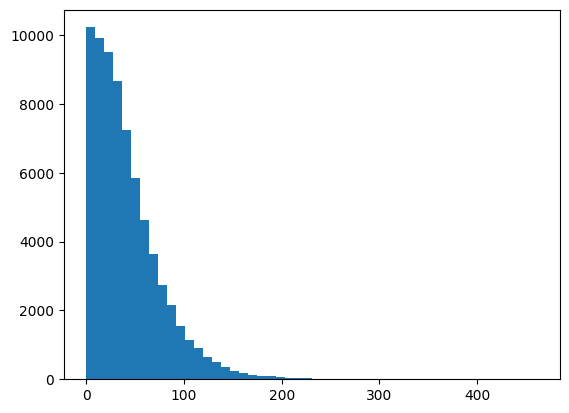

In [30]:
import matplotlib.pyplot as plt
plt.hist(pdf_rename['pa_mv_convert'], bins=50)
plt.show()

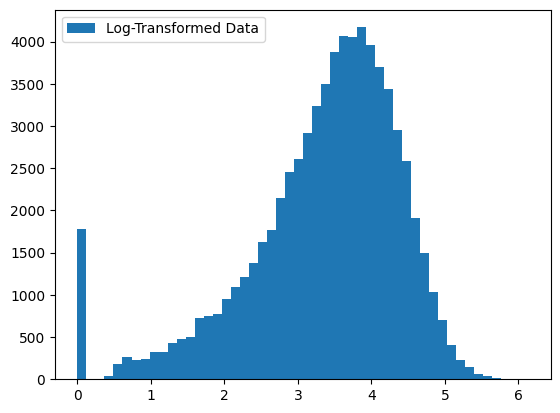

In [31]:
# Apply log transformation to the data
pdf_rename['pa_mv_convert_log'] = np.log(pdf_rename['pa_mv_convert']+1.0)

# Plot the original data and the log-transformed data
import matplotlib.pyplot as plt
#plt.hist(data, bins=50, label='Original Data')
plt.hist(pdf_rename['pa_mv_convert_log'], bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

In [32]:
pdf_rename['acc_end_date'] = pd.to_datetime(pdf_rename['acc_end_date'])
pdf_rename['study_t2e'] = pdf_rename["online_dep_date"] - pdf_rename["acc_start_date"] 
pdf_rename['study_t2e'].head(10)

2     415 days 14:00:00
4     599 days 14:00:00
13    481 days 14:00:00
15    968 days 14:00:00
21    932 days 14:00:00
23   1134 days 14:00:00
26    511 days 14:00:00
37    584 days 14:00:00
40    588 days 14:00:00
46   1061 days 14:00:00
Name: study_t2e, dtype: timedelta64[ns]

In [33]:
pdf_rename['study_t2e'] = pdf_rename['study_t2e'].astype(str)
# Extract numeric part (number of days)
pdf_rename['study_t2e'] = pdf_rename['study_t2e'].str.split().str[0].astype(int)
pdf_rename['study_t2e'] = pdf_rename['study_t2e']/365
pdf_rename['study_t2e'].head(5)

2     1.136986
4     1.641096
13    1.317808
15    2.652055
21    2.553425
Name: study_t2e, dtype: float64

In [34]:
pdf_rename["acc_start_date"] = pd.to_datetime(pdf_rename["acc_start_date"])
pdf_rename["i21_date"] = pd.to_datetime(pdf_rename["i21_date"])
#convert comorbidity diagnosis dates to datetime format
pdf_rename["i10_date"] = pd.to_datetime(pdf_rename["i10_date"])
pdf_rename["i15_date"] = pd.to_datetime(pdf_rename["i15_date"])
pdf_rename["e78_date"] = pd.to_datetime(pdf_rename["e78_date"])
pdf_rename["e10_date"] = pd.to_datetime(pdf_rename["e10_date"])
pdf_rename["e11_date"] = pd.to_datetime(pdf_rename["e11_date"])
pdf_rename["i50_date"] = pd.to_datetime(pdf_rename["i50_date"])
pdf_rename["i25_date"] = pd.to_datetime(pdf_rename["i25_date"])

In [35]:
#create hypertension category
#prep htn cases
pdf_rename['i10_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i10_date']).dt.days
pdf_rename['i15_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i15_date']).dt.days

# check for htn; if yes, return 1
def check_htn_criteria(row):
    if row['i10_time'] > 0 or row['i15_time'] > 0 or '1065':
        return 1
    else:
        return 0

pdf_rename['htn_yes'] = pdf_rename.apply(check_htn_criteria, axis=1)

In [36]:
#create heart failure category
#prep  cases
pdf_rename['i50_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i50_date']).dt.days

# check for htn; if yes, return 1
def check_htn_criteria(row):
    if row['i50_time'] > 0 :# or '1076' in row['sr_illness']:
        return 1
    else:
        return 0

pdf_rename['hf_yes'] = pdf_rename.apply(check_htn_criteria, axis=1)

In [37]:
#create cad category
#prep  cases
pdf_rename['i25_time'] = (pdf_rename['acc_start_date'] - pdf_rename['i25_date']).dt.days

# check for htn; if yes, return 1
def check_htn_criteria(row):
    if row['i25_time'] > 0:
        return 1
    else:
        return 0

pdf_rename['cad_yes'] = pdf_rename.apply(check_htn_criteria, axis=1)

In [38]:
#create cancer covariate
pdf_rename['cancer_yes'] = pdf_rename['p134_i0'].apply(lambda x: 1 if x > 0 else 0)

In [39]:
#create cancer category
#prep  cases
pdf_rename["p40005_i0"] = pd.to_datetime(pdf_rename["p40005_i0"])
pdf_rename['cancer_time'] = (pdf_rename['acc_start_date'] - pdf_rename['p40005_i0']).dt.days

# check for htn; if yes, return 1
def check_htn_criteria(row):
    if row['cancer_time'] > 0:
        return 1
    else:
        return 0

pdf_rename['cancer_time_yes'] = pdf_rename.apply(check_htn_criteria, axis=1)

In [40]:
# check for htn; if yes, return 1
def check_can_criteria(row):
    if row['cancer_time_yes'] > 0 or row['cancer_yes'] > 0:
        return 1
    else:
        return 0

pdf_rename['cancer_comp_yes'] = pdf_rename.apply(check_can_criteria, axis=1)

In [41]:
#create hyperlipidemia category
#prep hchol cases
pdf_rename['e78_time'] = (pdf_rename['acc_start_date'] - pdf_rename['e78_date']).dt.days
def check_hchol_criteria(row):
    if row['e78_time'] > 0:# or '1473' in row['sr_illness']:
        return 1
    else:
        return 0
    
pdf_rename['hchol_yes'] = pdf_rename.apply(check_hchol_criteria, axis=1)

In [42]:
#create diabetes category
#prep diabetes cases
pdf_rename['e10_date'] = pd.to_datetime(pdf_rename['e10_date'])
pdf_rename['e11_date'] = pd.to_datetime(pdf_rename['e11_date'])
pdf_rename['acc_end_date'] = pd.to_datetime(pdf_rename['acc_end_date'])
pdf_rename['e10_time'] = (pdf_rename['acc_start_date'] - pdf_rename['e10_date']).dt.days
pdf_rename['e11_time'] = (pdf_rename['acc_start_date'] - pdf_rename['e11_date']).dt.days

def check_diab_criteria(row):
    if row['e10_time'] > 0 or row['e11_time'] > 0:# or '1222' in row['sr_illness'] or '1223' in row['sr_illness']:
        return 1
    else:
        return 0

pdf_rename['diab_yes'] = pdf_rename.apply(check_diab_criteria, axis=1)

In [43]:
#create comorbidity covariate for analysis and filter covariate for baseline characteristics table considering set of comorbidities created above
pdf_rename['card_sum'] = pdf_rename[['htn_yes', 'hf_yes', 'cad_yes']].sum(axis=1)
pdf_rename['card_sum_filter'] = pdf_rename['card_sum'].apply(lambda x: 1 if x > 0 else 0)

In [44]:
prior_stroke_df = pdf_rename.loc[(pdf_rename['g45_time'] > 0) | (pdf_rename['h34_time'] > 0)| (pdf_rename['i60_time'] > 0) | (pdf_rename['i61_time'] > 0) | (pdf_rename['i62_time'] > 0)| (pdf_rename['i63_time'] > 0) | (pdf_rename['i64_time'] > 0)]
len(prior_stroke_df)

1660

In [45]:
prior_stroke_df.prestroke_dep.sum()

158

In [46]:
incidentcevd_df = pdf_rename.loc[~((pdf_rename['g45_time'] > 0) | (pdf_rename['h34_time'] > 0)| (pdf_rename['i60_time'] > 0) | (pdf_rename['i61_time'] > 0) | (pdf_rename['i62_time'] > 0)| (pdf_rename['i63_time'] > 0) | (pdf_rename['i64_time'] > 0))]
len(incidentcevd_df)

69125

In [47]:
pdf_rename = incidentcevd_df
len(pdf_rename)

69125

In [48]:
#drop prior CevD px who have recorded diagnosis in medical records
#drop cases with a prior vascular dementia (F01)
pdf_rename['f01_time'] = (pdf_rename['online_dep_date'] - pdf_rename['f01_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['f01_time'] < 0) | (pdf_rename['f01_time'].isna())]

#drop cases with a prior TIA (G45)
pdf_rename['g45_time'] = (pdf_rename['online_dep_date'] - pdf_rename['g45_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['g45_time'] < 0) | (pdf_rename['g45_time'].isna())]

#drop cases with a prior vascular brain syndromes of CeVD (G46)
pdf_rename['g46_time'] = (pdf_rename['online_dep_date'] - pdf_rename['g46_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['g46_time'] < 0) | (pdf_rename['g46_time'].isna())]

#drop cases with a prior RAO (H34)
pdf_rename['h34_time'] = (pdf_rename['online_dep_date'] - pdf_rename['h34_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['h34_time'] < 0) | (pdf_rename['h34_time'].isna())]

#drop cases with a prior Nontraumatic subarachnoid hemorrhage (I60)
pdf_rename['i60_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i60_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i60_time'] < 0) | (pdf_rename['i60_time'].isna())]

#drop cases with a prior Nontraumatic intracerebral hemorrhage (I61)
pdf_rename['i61_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i61_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i61_time'] < 0) | (pdf_rename['i61_time'].isna())]

#drop cases with a prior Other and unspecified nontraumatic intracranial hemorrhage (I62)
pdf_rename['i62_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i62_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i62_time'] < 0) | (pdf_rename['i62_time'].isna())]

#drop cases with a prior intracerebral infarction (I63)
pdf_rename['i63_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i63_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i63_time'] < 0) | (pdf_rename['i63_time'].isna())]

#drop cases with a prior unspecified stroke (I64)
pdf_rename['i64_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i64_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i64_time'] < 0) | (pdf_rename['i64_time'].isna())]

#drop cases with a prior occlusion/stenosis precerebral arteries (I65)
pdf_rename['i65_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i65_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i65_time'] < 0) | (pdf_rename['i65_time'].isna())]

#drop cases with a prior occlusion/stenosis cerebral arteries (I66)
pdf_rename['i66_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i66_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i66_time'] < 0) | (pdf_rename['i66_time'].isna())]

#drop cases with a prior Other cerebrovascular diseases (I67)
pdf_rename['i67_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i67_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i67_time'] < 0) | (pdf_rename['i67_time'].isna())]

#drop cases with a prior Cerebrovascular disorders in diseases classified elsewhere (I68)
pdf_rename['i68_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i68_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i68_time'] < 0) | (pdf_rename['i68_time'].isna())]

#drop cases with a prior Sequelae of cerebrovascular disease (I69)
pdf_rename['i69_time'] = (pdf_rename['online_dep_date'] - pdf_rename['i69_date']).dt.days
pdf_rename = pdf_rename.loc[(pdf_rename['i69_time'] < 0) | (pdf_rename['i69_time'].isna())]

print('after dropping px with CeVD diagnoses in medical records prior to baseline', len(pdf_rename))

after dropping px with CeVD diagnoses in medical records prior to baseline 68685


In [49]:
#if assessment date - event date < 0, then copy absolute value to corresponding column
pdf_rename.loc[pdf_rename['f01_time'] < 0, 'f01_t2e'] = abs(pdf_rename['f01_time'])
pdf_rename.loc[pdf_rename['g45_time'] < 0, 'g45_t2e'] = abs(pdf_rename['g45_time'])
pdf_rename.loc[pdf_rename['g46_time'] < 0, 'g46_t2e'] = abs(pdf_rename['g46_time'])
pdf_rename.loc[pdf_rename['h34_time'] < 0, 'h34_t2e'] = abs(pdf_rename['h34_time'])
pdf_rename.loc[pdf_rename['i60_time'] < 0, 'i60_t2e'] = abs(pdf_rename['i60_time'])
pdf_rename.loc[pdf_rename['i61_time'] < 0, 'i61_t2e'] = abs(pdf_rename['i61_time'])
pdf_rename.loc[pdf_rename['i62_time'] < 0, 'i62_t2e'] = abs(pdf_rename['i62_time'])
pdf_rename.loc[pdf_rename['i63_time'] < 0, 'i63_t2e'] = abs(pdf_rename['i63_time'])
pdf_rename.loc[pdf_rename['i64_time'] < 0, 'i64_t2e'] = abs(pdf_rename['i64_time'])
pdf_rename.loc[pdf_rename['i65_time'] < 0, 'i65_t2e'] = abs(pdf_rename['i65_time'])
pdf_rename.loc[pdf_rename['i66_time'] < 0, 'i66_t2e'] = abs(pdf_rename['i66_time'])
pdf_rename.loc[pdf_rename['i67_time'] < 0, 'i67_t2e'] = abs(pdf_rename['i67_time'])
pdf_rename.loc[pdf_rename['i68_time'] < 0, 'i68_t2e'] = abs(pdf_rename['i68_time'])
pdf_rename.loc[pdf_rename['i69_time'] < 0, 'i69_t2e'] = abs(pdf_rename['i69_time'])
#if there is a time-to-event in XXX_t2e, then place 1 in outcome column for each CeVD
pdf_rename.loc[pdf_rename['f01_t2e'].notna(), 'f01_event'] = 1
pdf_rename.loc[pdf_rename['g45_t2e'].notna(), 'g45_event'] = 1
pdf_rename.loc[pdf_rename['g46_t2e'].notna(), 'g46_event'] = 1
pdf_rename.loc[pdf_rename['h34_t2e'].notna(), 'h34_event'] = 1
pdf_rename.loc[pdf_rename['i60_t2e'].notna(), 'i60_event'] = 1
pdf_rename.loc[pdf_rename['i61_t2e'].notna(), 'i61_event'] = 1
pdf_rename.loc[pdf_rename['i62_t2e'].notna(), 'i62_event'] = 1
pdf_rename.loc[pdf_rename['i63_t2e'].notna(), 'i63_event'] = 1
pdf_rename.loc[pdf_rename['i64_t2e'].notna(), 'i64_event'] = 1
pdf_rename.loc[pdf_rename['i65_t2e'].notna(), 'i65_event'] = 1
pdf_rename.loc[pdf_rename['i66_t2e'].notna(), 'i66_event'] = 1
pdf_rename.loc[pdf_rename['i67_t2e'].notna(), 'i67_event'] = 1
pdf_rename.loc[pdf_rename['i68_t2e'].notna(), 'i68_event'] = 1
pdf_rename.loc[pdf_rename['i69_t2e'].notna(), 'i69_event'] = 1
#create composite cevd outcome value
pdf_rename.loc[(pdf_rename['f01_event'].notna()) | (pdf_rename['g45_event'].notna()) | (pdf_rename['g46_event'].notna()) | (pdf_rename['h34_event'].notna()) | (pdf_rename['i60_event'].notna()) | (pdf_rename['i61_event'].notna()) | (pdf_rename['i62_event'].notna()) | (pdf_rename['i63_event'].notna()) | (pdf_rename['i64_event'].notna()) | (pdf_rename['i65_event'].notna()) | (pdf_rename['i66_event'].notna()) | (pdf_rename['i67_event'].notna()) | (pdf_rename['i68_event'].notna()) | (pdf_rename['i69_event'].notna()), 'cevd_event'] = 1
pdf_rename['cevd_event'] = pdf_rename['cevd_event'].fillna(0)

#check number of future cevd_events 
sum_cevdevents = pdf_rename['cevd_event'].sum()
print('Number of CeVD events (total)', sum_cevdevents)

Number of CeVD events (total) 1678.0


In [50]:
#create cevd time-to-event value for earliest cevd event
pdf_rename['cevd_t2e'] = pdf_rename[['f01_t2e', 'g45_t2e', 'g46_t2e', 'h34_t2e', 'i60_t2e', 'i61_t2e', 'i62_t2e', 'i63_t2e', 'i64_t2e', 'i65_t2e', 'i66_t2e', 'i67_t2e', 'i68_t2e', 'i69_t2e']].min(axis=1)

In [51]:
#convert all t2e columns to numeric for filtering
def convert_t2e_to_numeric(df):
    df['f01_t2e'] = pd.to_numeric(df['f01_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['g45_t2e'] = pd.to_numeric(df['g45_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['g46_t2e'] = pd.to_numeric(df['g46_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['h34_t2e'] = pd.to_numeric(df['h34_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i60_t2e'] = pd.to_numeric(df['i60_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i61_t2e'] = pd.to_numeric(df['i61_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i62_t2e'] = pd.to_numeric(df['i62_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i63_t2e'] = pd.to_numeric(df['i63_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i64_t2e'] = pd.to_numeric(df['i64_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i65_t2e'] = pd.to_numeric(df['i65_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i66_t2e'] = pd.to_numeric(df['i66_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i67_t2e'] = pd.to_numeric(df['i67_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i68_t2e'] = pd.to_numeric(df['i68_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i69_t2e'] = pd.to_numeric(df['i69_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['cevd_t2e'] = pd.to_numeric(df['cevd_t2e'], errors='coerce').astype(pd.Int64Dtype())
    return df

pdf_rename = convert_t2e_to_numeric(pdf_rename)

In [52]:
#clean all cevd types to only have t2e for the initial CeVD diagnosis after accelerometer study commencement
def check_cevd_types(df):
    for index, row in df.iterrows():
        if pd.notna(row['f01_t2e']):
            if row['f01_t2e'] != row['cevd_t2e']:
                df.at[index, 'f01_t2e'] = None
        if pd.notna(row['g45_t2e']):
            if row['g45_t2e'] != row['cevd_t2e']:
                 df.at[index, 'g45_t2e'] = None
        if pd.notna(row['g46_t2e']):
            if row['g46_t2e'] != row['cevd_t2e']:
                 df.at[index, 'g46_t2e'] = None
        if pd.notna(row['h34_t2e']):
            if row['h34_t2e'] != row['cevd_t2e']:
                 df.at[index, 'h34_t2e'] = None
        if pd.notna(row['i60_t2e']):
            if row['i60_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i60_t2e'] = None
        if pd.notna(row['i61_t2e']):
            if row['i61_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i61_t2e'] = None
        if pd.notna(row['i62_t2e']):
            if row['i62_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i62_t2e'] = None
        if pd.notna(row['i63_t2e']):
            if row['i63_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i63_t2e'] = None
        if pd.notna(row['i64_t2e']):
            if row['i64_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i64_t2e'] = None
        if pd.notna(row['i65_t2e']):
            if row['i65_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i65_t2e'] = None
        if pd.notna(row['i66_t2e']):
            if row['i66_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i66_t2e'] = None
        if pd.notna(row['i67_t2e']):
            if row['i67_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i67_t2e'] = None
        if pd.notna(row['i68_t2e']):
            if row['i68_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i68_t2e'] = None
        if pd.notna(row['i69_t2e']):
            if row['i69_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i69_t2e'] = None
    return df

pdf_rename = check_cevd_types(pdf_rename)

In [53]:
pdf_rename.cevd_t2e.head(10)

2     <NA>
4     <NA>
13    <NA>
15    <NA>
21    <NA>
23    <NA>
26    <NA>
37    <NA>
40    <NA>
46    <NA>
Name: cevd_t2e, dtype: Int64

In [54]:
incident_cevd_sort = pdf_rename.loc[(pdf_rename['cevd_event']==1)]
#control_df = pdf_rename.loc[~(pdf_rename['cevd_event']==1)]
control_df = pdf_rename
len(incident_cevd_sort)

1678

In [55]:
len(control_df)

68685

In [56]:
incidentstroke_df = pdf_rename.loc[((pdf_rename['g45_time'] < 0) | (pdf_rename['h34_time'] < 0)| (pdf_rename['i60_time'] < 0) | (pdf_rename['i61_time'] < 0) | (pdf_rename['i62_time'] < 0)| (pdf_rename['i63_time'] < 0) | (pdf_rename['i64_time'] < 0))]
len(incidentstroke_df)

1173

In [57]:
# Drop rows where classroom = 2 and building = 1
prior_stroke_df = prior_stroke_df[~((prior_stroke_df['dep_diag_yes'] == 1) & (prior_stroke_df['prestroke_dep'] == 0))]
len(prior_stroke_df)

1603

In [58]:
len(prior_stroke_df)

1603

In [59]:
controlpriorcohort = prior_stroke_df[prior_stroke_df['dep_diag_yes']==1]
len(controlpriorcohort)
                                

155

In [60]:
prior_stroke_df['pa_sleep_more'] = 0  # Initialize columnA with zeros
prior_stroke_df.loc[prior_stroke_df['pa_sleep_convert_hr'] > 9, 'pa_sleep_more'] = 1  # Set 1 where the condition is met
prior_stroke_df['pa_sleep_more'].sum()

708

In [61]:
prior_stroke_df['pa_sleep_less'] = 0  # Initialize columnA with zeros
prior_stroke_df.loc[prior_stroke_df['pa_sleep_convert_hr'] < 7, 'pa_sleep_less'] = 1  # Set 1 where the condition is met
prior_stroke_df['pa_sleep_less'].sum()

88

In [62]:
prior_stroke_df['pa_sleep_more']  = (prior_stroke_df['pa_sleep_convert_hr'] > 9).sum()
print("Count of participants who sleep longer than 9 hr:", count_9_sleep)
prior_stroke_df['pa_sleep_less']  = (prior_stroke_df['pa_sleep_convert_hr'] <7).sum()
print("Count of participants who sleep less than 7 hr:", count_7_sleep)

NameError: name 'count_9_sleep' is not defined

In [ ]:
deppriorcohort = prior_stroke_df[prior_stroke_df['dep_diag_yes']==0]
len(deppriorcohort)
                                

In [ ]:
count_9_sleep = (deppriorcohort['pa_sleep_convert_hr'] > 9).sum()
print("Count of participants who sleep longer than 9 hr:", count_9_sleep)
count_7_sleep = (deppriorcohort['pa_sleep_convert_hr'] <7).sum()
print("Count of participants who sleep less than 7 hr:", count_7_sleep)

In [63]:

#to csv for dataframe for follow-up cross-sectional analysis
prior_stroke_df.to_csv('prior_stroke_model.csv', index=False)

#to csv for dataframe for follow-up cross-sectional analysis
incident_cevd_sort.to_csv('incident_cevd_sort_model.csv', index=False)

#to csv for dataframe for follow-up cross-sectional analysis
control_df.to_csv('control_model.csv', index=False)

incidentstroke_df.to_csv('incidentstroke_df.csv', index=False)

In [ ]:
prior_stroke_df.dep_diag_yes.sum()

In [ ]:
def smallest_positive(row):
    positives = row[row > 0]  # Filter out negative values
    return positives.max() if not positives.empty else np.nan  # Return min or NaN

# Apply the function only to columns A, B, and C
prior_stroke_df['stroke_t2e'] = prior_stroke_df[['h34_time', 'g45_time', 'i60_time', 'i61_time', 'i62_time', 'i63_time', 'i64_time']].apply(smallest_positive, axis=1)


In [ ]:
def smallest_positive(row):
    positives = row[row > 0]  # Filter out negative values
    return positives.max() if not positives.empty else np.nan  # Return min or NaN

# Apply the function only to columns A, B, and C
prior_stroke_df['stroke_t2e'] = prior_stroke_df[['h34_time', 'g45_time', 'i60_time', 'i61_time', 'i62_time', 'i63_time', 'i64_time']].apply(smallest_positive, axis=1)


In [ ]:

#to csv for dataframe for follow-up cross-sectional analysis
prior_stroke_df.to_csv('prior_stroke_model.csv', index=False)


In [ ]:
incident_cevd_sort['g46_event'].sum() 

In [ ]:
prior_stroke_df.study_t2e.head(10)

In [ ]:
len(incident_cevd_sort)

In [ ]:
incident_cevd_sort.white_yes.sum()

In [ ]:
# Selecting specific columns to create a new DataFrame
#inidentstroke_df = control_df[['p20510', 'dep_diag_yes', 'pa_sleep_convert_hr', 'white_yes', 'acc_age', 'male', 'pa_sed_convert', 'pa_light_convert', 'pa_mv_convert_log']]  # Select columns 'A' and 'C'
# Display the new DataFrame
print(incidentstroke_df)

In [ ]:
depfuturestroke_df = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 1]
depfuturestroke_df.white_yes.sum()

In [ ]:
len(depfuturestroke_df)

In [ ]:

incidentstroke_df.to_csv('incidentstroke_df.csv', index=False)

In [ ]:

#to csv for dataframe for follow-up cross-sectional analysis
pdf_rename.to_csv('cevd_third_model.csv', index=False)

In [ ]:
###### incident cevd

In [ ]:
incidentstroke_df.g45_event.sum()

In [ ]:
incidentstroke_df.h34_event.sum()

In [ ]:
incidentstroke_df.i60_event.sum()

In [ ]:
incidentstroke_df.i61_event.sum()

In [ ]:
incidentstroke_df.i62_event.sum()

In [ ]:
incidentstroke_df.i63_event.sum()

In [ ]:
incidentstroke_df.i64_event.sum()

In [ ]:
# Replace 'your_file.csv' with the path to your CSV file
incidentstroke_df_clean = pd.read_csv('incidentstroke_df.csv')


In [ ]:
incidentstroke_df_clean['i64_event'].fillna(0,inplace=True)
incidentstroke_df_clean['i63_event'].fillna(0,inplace=True)
incidentstroke_df_clean['i62_event'].fillna(0,inplace=True)
incidentstroke_df_clean['i61_event'].fillna(0,inplace=True)
incidentstroke_df_clean['i60_event'].fillna(0,inplace=True)
incidentstroke_df_clean['h34_event'].fillna(0,inplace=True)
incidentstroke_df_clean['g45_event'].fillna(0,inplace=True)
incidentstroke_df_clean['g45_event'].head()

In [ ]:
# Function to calculate the sum and check condition
def sum_multiplestrokes(row):
    return 1 if (row['i64_event'] + row['i63_event'] + row['i62_event'] + row['i61_event'] + row['i60_event'] + row['h34_event'] + row['g45_event']) > 1 else 0

# Apply the function to each row
incidentstroke_df_clean['multi_post_stroke'] = incidentstroke_df_clean.apply(sum_multiplestrokes, axis=1)
incidentstroke_df_clean['multi_post_stroke'].head()

In [ ]:
incidentstroke_df_clean['multi_post_stroke'].sum()

In [ ]:
len(incidentstroke_df_clean)

In [ ]:
incidentstroke_df_clean['g46_event'].fillna(0,inplace=True)
incidentstroke_df_clean['i65_event'].fillna(0,inplace=True)
incidentstroke_df_clean['i66_event'].fillna(0,inplace=True)
incidentstroke_df_clean['i67_event'].fillna(0,inplace=True)
incidentstroke_df_clean['i68_event'].fillna(0,inplace=True)
incidentstroke_df_clean['i69_event'].fillna(0,inplace=True)
incidentstroke_df_clean['g45_event'].head()

In [ ]:
# Function to calculate the sum and check condition
def sum_multiplestrokes(row):
    return 1 if (row['g46_event'] + row['i65_event'] + row['i66_event'] + row['i67_event'] + row['i68_event'] + row['i69_event']) > 0 else 0

# Apply the function to each row
incidentstroke_df_clean['post_cevd_nonstroke'] = incidentstroke_df_clean.apply(sum_multiplestrokes, axis=1)
incidentstroke_df_clean['post_cevd_nonstroke'].head()

In [ ]:
incidentstroke_df_clean['post_cevd_nonstroke'].sum()

In [ ]:
incident_cevd_sort['i64_event'].fillna(0,inplace=True)
incident_cevd_sort['i63_event'].fillna(0,inplace=True)
incident_cevd_sort['i62_event'].fillna(0,inplace=True)
incident_cevd_sort['i61_event'].fillna(0,inplace=True)
incident_cevd_sort['i60_event'].fillna(0,inplace=True)
incident_cevd_sort['h34_event'].fillna(0,inplace=True)
incident_cevd_sort['g45_event'].fillna(0,inplace=True)
incident_cevd_sort['g45_event'].head()

In [ ]:
# Function to calculate the sum and check condition
def sum_multiplestrokes(row):
    return 1 if (row['i64_event'] + row['i63_event'] + row['i62_event'] + row['i61_event'] + row['i60_event'] + row['h34_event'] + row['g45_event']) > 1 else 0

# Apply the function to each row
incident_cevd_sort['multi_post_stroke'] = incident_cevd_sort.apply(sum_multiplestrokes, axis=1)
incident_cevd_sort['multi_post_stroke'].head()

In [ ]:
# Function to calculate the sum and check condition
def sum_multiplestrokes(row):
    return 1 if (row['i64_event'] + row['i63_event'] + row['i62_event'] + row['i61_event'] + row['i60_event'] + row['h34_event'] + row['g45_event']) > 0 else 0

# Apply the function to each row
incident_cevd_sort['post_stroke'] = incident_cevd_sort.apply(sum_multiplestrokes, axis=1)
incident_cevd_sort['post_stroke'].head()

In [ ]:
incident_cevd_sort['g46_event'].fillna(0,inplace=True)
incident_cevd_sort['i65_event'].fillna(0,inplace=True)
incident_cevd_sort['i66_event'].fillna(0,inplace=True)
incident_cevd_sort['i67_event'].fillna(0,inplace=True)
incident_cevd_sort['i68_event'].fillna(0,inplace=True)
incident_cevd_sort['i69_event'].fillna(0,inplace=True)
incident_cevd_sort['g45_event'].head()

In [ ]:
# Function to calculate the sum and check condition
def sum_multiplestrokes(row):
    return 1 if (row['g46_event'] + row['i65_event'] + row['i66_event'] + row['i67_event'] + row['i68_event'] + row['i69_event']) > 0 else 0

# Apply the function to each row
incident_cevd_sort['post_cevd_nonstroke'] = incident_cevd_sort.apply(sum_multiplestrokes, axis=1)
incident_cevd_sort['post_cevd_nonstroke'].head()

In [ ]:
incident_cevd_sort['post_cevd_nonstroke'].sum()

In [ ]:
###stats for prior stroke

In [ ]:
prior_stroke_df['g46_time'].fillna(0,inplace=True)
prior_stroke_df['i65_time'].fillna(0,inplace=True)
prior_stroke_df['i66_time'].fillna(0,inplace=True)
prior_stroke_df['i67_time'].fillna(0,inplace=True)
prior_stroke_df['i68_time'].fillna(0,inplace=True)
prior_stroke_df['i69_time'].fillna(0,inplace=True)
prior_stroke_df['g45_time'].head()


def create_events(row):
    return 1 if (row['g45_time'] > 0) else 0
prior_stroke_df['g45_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['g45_event'].head()

In [ ]:
def create_events(row):
    return 1 if (row['g46_time'] > 0) else 0
prior_stroke_df['g46_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['g46_event'].head()
def create_events(row):
    return 1 if (row['h34_time'] > 0) else 0
prior_stroke_df['h34_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['h34_event'].head()
def create_events(row):
    return 1 if (row['i60_time'] > 0) else 0
prior_stroke_df['i60_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i60_event'].head()
def create_events(row):
    return 1 if (row['i61_time'] > 0) else 0
prior_stroke_df['i61_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i61_event'].head()
def create_events(row):
    return 1 if (row['i62_time'] > 0) else 0
prior_stroke_df['i62_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i62_event'].head()
def create_events(row):
    return 1 if (row['i63_time'] > 0) else 0
prior_stroke_df['i63_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i63_event'].head()
def create_events(row):
    return 1 if (row['i64_time'] > 0) else 0
prior_stroke_df['i64_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i64_event'].head()
def create_events(row):
    return 1 if (row['i65_time'] > 0) else 0
prior_stroke_df['i65_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i65_event'].head()
def create_events(row):
    return 1 if (row['i66_time'] > 0) else 0
prior_stroke_df['i66_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i66_event'].head()
def create_events(row):
    return 1 if (row['i67_time'] > 0) else 0
prior_stroke_df['i67_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i67_event'].head()
def create_events(row):
    return 1 if (row['i68_time'] > 0) else 0
prior_stroke_df['i68_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i68_event'].head()
def create_events(row):
    return 1 if (row['i69_time'] > 0) else 0
prior_stroke_df['i69_event'] = prior_stroke_df.apply(create_events, axis=1)
prior_stroke_df['i69_event'].head()

In [ ]:
# Function to calculate the sum and check condition
def sum_multiplestrokes(row):
    return 1 if (row['g46_event'] + row['i65_event'] + row['i66_event'] + row['i67_event'] + row['i68_event'] + row['i69_event']) > 0 else 0

# Apply the function to each row
prior_stroke_df['cevd_priorstroke'] = prior_stroke_df.apply(sum_multiplestrokes, axis=1)
prior_stroke_df['cevd_priorstroke'].head()

In [ ]:
prior_stroke_df['cevd_priorstroke'].sum()

In [ ]:
prior_stroke_df['i64_time'].fillna(0,inplace=True)
prior_stroke_df['i63_time'].fillna(0,inplace=True)
prior_stroke_df['i62_time'].fillna(0,inplace=True)
prior_stroke_df['i61_time'].fillna(0,inplace=True)
prior_stroke_df['i60_time'].fillna(0,inplace=True)
prior_stroke_df['h34_time'].fillna(0,inplace=True)
prior_stroke_df['g45_time'].fillna(0,inplace=True)
prior_stroke_df['g45_time'].head()

In [ ]:
# Function to calculate the sum and check condition
def sum_multiplestrokes(row):
    return 1 if (row['g45_event'] + row['h34_event'] + row['i60_event'] + row['i61_event'] + row['i62_event'] + row['i63_event'] + row['i64_event'] ) > 1 else 0

prior_stroke_df['multi_pre_stroke'] = prior_stroke_df.apply(sum_multiplestrokes, axis=1)
prior_stroke_df['multi_pre_stroke'].head()

In [ ]:
prior_stroke_df['multi_pre_stroke'].sum()

In [ ]:
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 1]
mean_age = subset['acc_age'].mean()
std_dev_age = subset['acc_age'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=prior_stroke_df['acc_age'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 0]
mean_age = subset['acc_age'].mean()
std_dev_age = subset['acc_age'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=prior_stroke_df['acc_age'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'male'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'male'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'male'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'male'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['male'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'white_yes'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'white_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'white_yes'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'white_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['white_yes'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'pa_sleep_more'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'pa_sleep_more'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'pa_sleep_more'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'pa_sleep_more'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['pa_sleep_more'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'pa_sleep_less'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'pa_sleep_less'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'pa_sleep_less'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'pa_sleep_less'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['pa_sleep_less'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 1]
mean_age = subset['pa_sleep_convert_hr'].mean()
std_dev_age = subset['pa_sleep_convert_hr'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=prior_stroke_df['pa_sleep_convert_hr'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 0]
mean_age = subset['pa_sleep_convert_hr'].mean()
std_dev_age = subset['pa_sleep_convert_hr'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=prior_stroke_df['pa_sleep_convert_hr'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 1]
mean_age = subset['pa_light_convert'].mean()
std_dev_age = subset['pa_light_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=prior_stroke_df['pa_light_convert'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 0]
mean_age = subset['pa_light_convert'].mean()
std_dev_age = subset['pa_light_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=prior_stroke_df['pa_light_convert'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
prior_stroke_df['stroke_t2e'] = pd.to_numeric(prior_stroke_df['stroke_t2e'])
prior_stroke_df['stroke_t2e'] = (prior_stroke_df['stroke_t2e'])/365
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 1]
mean_age = subset['stroke_t2e'].mean()
std_dev_age = subset['stroke_t2e'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=prior_stroke_df['stroke_t2e'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 0]
mean_age = subset['stroke_t2e'].mean()
std_dev_age = subset['stroke_t2e'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=prior_stroke_df['stroke_t2e'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 1]
mean_age = subset['pa_sed_convert'].mean()
std_dev_age = subset['pa_sed_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=prior_stroke_df['pa_sed_convert'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 0]
mean_age = subset['pa_sed_convert'].mean()
std_dev_age = subset['pa_sed_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=prior_stroke_df['pa_sed_convert'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 1]
mean_age = subset['pa_mv_convert'].mean()
std_dev_age = subset['pa_mv_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=prior_stroke_df['pa_mv_convert'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 0]
mean_age = subset['pa_mv_convert'].mean()
std_dev_age = subset['pa_mv_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=prior_stroke_df['pa_mv_convert'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 1]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=prior_stroke_df['study_t2e'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = prior_stroke_df[prior_stroke_df['dep_diag_yes'] == 0]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=prior_stroke_df['study_t2e'], y=prior_stroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
#prior_stroke_df['cevd_t2e'] = prior_stroke_df[[ 'g45_time', 'h34_time', 'i60_time', 'i61_time', 'i62_time', 'i63_time', 'i64_time']].min(axis=1)
#prior_stroke_df['cevd_t2e'] = prior_stroke_df['cevd_t2e'].abs()

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'card_sum_filter'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'card_sum_filter'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'card_sum_filter'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'card_sum_filter'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['card_sum_filter'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'diab_yes'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'diab_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'diab_yes'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'diab_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['diab_yes'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'hchol_yes'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'hchol_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'hchol_yes'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'hchol_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['hchol_yes'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'htn_yes'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'htn_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'htn_yes'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'htn_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['htn_yes'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'cevd_priorstroke'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'cevd_priorstroke'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'cevd_priorstroke'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'cevd_priorstroke'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['cevd_priorstroke'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'multi_pre_stroke'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'multi_pre_stroke'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'multi_pre_stroke'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'multi_pre_stroke'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['multi_pre_stroke'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
def filter_sleep(value):
    return 1 if 7 <= value <= 9 else 0

prior_stroke_df['sleep_filter'] = prior_stroke_df['pa_sleep_convert_hr'].apply(filter_sleep)
prior_stroke_df['sleep_filter'].head(10)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'sleep_filter'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'sleep_filter'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'sleep_filter'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'sleep_filter'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['sleep_filter'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#####control baseline data

In [ ]:
subset = control_df[control_df['dep_diag_yes'] == 1]
mean_age = subset['acc_age'].mean()
std_dev_age = subset['acc_age'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=control_df['acc_age'], y=control_df['dep_diag_yes'], alternative = 'two-sided')
subset = control_df[control_df['dep_diag_yes'] == 0]
mean_age = subset['acc_age'].mean()
std_dev_age = subset['acc_age'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=control_df['acc_age'], y=control_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = control_df[control_df['dep_diag_yes'] == 1]
mean_age = subset['pa_sleep_convert_hr'].mean()
std_dev_age = subset['pa_sleep_convert_hr'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=control_df['pa_sleep_convert_hr'], y=control_df['dep_diag_yes'], alternative = 'two-sided')
subset = control_df[control_df['dep_diag_yes'] == 0]
mean_age = subset['pa_sleep_convert_hr'].mean()
std_dev_age = subset['pa_sleep_convert_hr'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=control_df['pa_sleep_convert_hr'], y=control_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = control_df[control_df['dep_diag_yes'] == 1]
mean_age = subset['pa_sed_convert'].mean()
std_dev_age = subset['pa_sed_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=control_df['pa_sed_convert'], y=control_df['dep_diag_yes'], alternative = 'two-sided')
subset = control_df[control_df['dep_diag_yes'] == 0]
mean_age = subset['pa_sed_convert'].mean()
std_dev_age = subset['pa_sed_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=control_df['pa_sed_convert'], y=control_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = control_df[control_df['dep_diag_yes'] == 1]
mean_age = subset['pa_light_convert'].mean()
std_dev_age = subset['pa_light_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=control_df['pa_light_convert'], y=control_df['dep_diag_yes'], alternative = 'two-sided')
subset = control_df[control_df['dep_diag_yes'] == 0]
mean_age = subset['pa_light_convert'].mean()
std_dev_age = subset['pa_light_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=control_df['pa_light_convert'], y=control_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = control_df[control_df['dep_diag_yes'] == 1]
mean_age = subset['pa_mv_convert'].mean()
std_dev_age = subset['pa_mv_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=control_df['pa_mv_convert'], y=control_df['dep_diag_yes'], alternative = 'two-sided')
subset = control_df[control_df['dep_diag_yes'] == 0]
mean_age = subset['pa_mv_convert'].mean()
std_dev_age = subset['pa_mv_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=control_df['pa_mv_convert'], y=control_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = control_df[control_df['dep_diag_yes'] == 1]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=control_df['study_t2e'], y=control_df['dep_diag_yes'], alternative = 'two-sided')
subset = control_df[control_df['dep_diag_yes'] == 0]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=control_df['study_t2e'], y=control_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
#get male/female data
percent_male_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'male'].mean() * 100
male_sum_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'male'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'male'].mean() * 100
male_sum_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'male'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(control_df['male'], control_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'white_yes'].mean() * 100
male_sum_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'white_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'white_yes'].mean() * 100
male_sum_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'white_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(control_df['white_yes'], control_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'htn_yes'].mean() * 100
male_sum_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'htn_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'htn_yes'].mean() * 100
male_sum_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'htn_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(control_df['htn_yes'], control_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'hchol_yes'].mean() * 100
male_sum_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'hchol_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'hchol_yes'].mean() * 100
male_sum_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'hchol_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(control_df['hchol_yes'], control_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'diab_yes'].mean() * 100
male_sum_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'diab_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'diab_yes'].mean() * 100
male_sum_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'diab_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(control_df['diab_yes'], control_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'card_sum_filter'].mean() * 100
male_sum_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'card_sum_filter'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'card_sum_filter'].mean() * 100
male_sum_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'card_sum_filter'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(control_df['card_sum_filter'], control_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'card_sum_filter'].mean() * 100
male_sum_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'card_sum_filter'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'card_sum_filter'].mean() * 100
male_sum_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'card_sum_filter'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(control_df['card_sum_filter'], control_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'cevd_priorstroke'].mean() * 100
male_sum_d = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 1, 'cevd_priorstroke'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'cevd_priorstroke'].mean() * 100
male_sum_c = prior_stroke_df.loc[prior_stroke_df['dep_diag_yes'] == 0, 'cevd_priorstroke'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(prior_stroke_df['cevd_priorstroke'], prior_stroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
control_df['g46_time'].fillna(0,inplace=True)
control_df['i65_time'].fillna(0,inplace=True)
control_df['i66_time'].fillna(0,inplace=True)
control_df['i67_time'].fillna(0,inplace=True)
control_df['i68_time'].fillna(0,inplace=True)
control_df['i69_time'].fillna(0,inplace=True)
control_df['i67_event'].sum()


In [ ]:
def create_events(row):
    return 1 if (row['g46_time'] > 0) else 0
control_df['g46_event'] = control_df.apply(create_events, axis=1)

def create_events(row):
    return 1 if (row['i65_time'] > 0) else 0
control_df['i65_event'] = control_df.apply(create_events, axis=1)

def create_events(row):
    return 1 if (row['i66_time'] > 0) else 0
control_df['i66_event'] = control_df.apply(create_events, axis=1)

def create_events(row):
    return 1 if (row['i67_time'] > 0) else 0
control_df['i67_event'] = control_df.apply(create_events, axis=1)

def create_events(row):
    return 1 if (row['i68_time'] > 0) else 0
control_df['i68_event'] = control_df.apply(create_events, axis=1)

def create_events(row):
    return 1 if (row['i69_time'] > 0) else 0
control_df['i69_event'] = control_df.apply(create_events, axis=1)

# Function to calculate the sum and check condition
def sum_multiplestrokes(row):
    return 1 if (row['g46_event'] + row['i65_event'] + row['i66_event'] + row['i67_event'] + row['i68_event'] + row['i69_event']) > 0 else 0

# Apply the function to each row
control_df['cevd_control'] = control_df.apply(sum_multiplestrokes, axis=1)
control_df['cevd_control'].head(20)

In [ ]:
#get male/female data
percent_male_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'cevd_control'].mean() * 100
male_sum_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'cevd_control'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'cevd_control'].mean() * 100
male_sum_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'cevd_control'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(control_df['cevd_control'], control_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
def filter_sleep(value):
    return 1 if 7 <= value <= 9 else 0

control_df['sleep_filter'] = control_df['pa_sleep_convert_hr'].apply(filter_sleep)
control_df['sleep_filter'].head(10)

In [ ]:
#get male/female data
percent_male_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'sleep_filter'].mean() * 100
male_sum_d = control_df.loc[control_df['dep_diag_yes'] == 1, 'sleep_filter'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'sleep_filter'].mean() * 100
male_sum_c = control_df.loc[control_df['dep_diag_yes'] == 0, 'sleep_filter'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(control_df['sleep_filter'], control_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#####incident_stroke

In [ ]:
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 1]
mean_age = subset['acc_age'].mean()
std_dev_age = subset['acc_age'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incidentstroke_df['acc_age'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 0]
mean_age = subset['acc_age'].mean()
std_dev_age = subset['acc_age'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incidentstroke_df['acc_age'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
#get male/female data
percent_male_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'male'].mean() * 100
male_sum_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'male'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'male'].mean() * 100
male_sum_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'male'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incidentstroke_df['male'], incidentstroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'white_yes'].mean() * 100
male_sum_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'white_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'white_yes'].mean() * 100
male_sum_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'white_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incidentstroke_df['white_yes'], incidentstroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
def filter_sleep(value):
    return 1 if 7 <= value <= 9 else 0

incidentstroke_df['sleep_filter'] = incidentstroke_df['pa_sleep_convert_hr'].apply(filter_sleep)


In [ ]:
#get male/female data
percent_male_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'sleep_filter'].mean() * 100
male_sum_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'sleep_filter'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'sleep_filter'].mean() * 100
male_sum_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'sleep_filter'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incidentstroke_df['sleep_filter'], incidentstroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 1]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incidentstroke_df['study_t2e'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 0]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incidentstroke_df['study_t2e'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
incidentstroke_df.cevd_t2e.head(20)

In [ ]:
incidentstroke_df_1 = incidentstroke_df.dropna(subset=['cevd_t2e'])
len(incidentstroke_df_1)

In [ ]:
incidentstroke_df['cevd_t2e1'] = pd.to_numeric(incidentstroke_df['cevd_t2e'])

In [ ]:
incidentstroke_df.to_csv('output.csv', index=False)  # Set index=False to avoid writing row indices
file_path = 'output.csv'  # Replace with your file path

# Import the CSV file into a DataFrame
incidentstroke_df = pd.read_csv(file_path)

In [ ]:
#incidentstroke_df['cevd_t2e'] = pd.to_numeric(incidentstroke_df['cevd_t2e'])
incidentstroke_df['cevd_t2e'] = incidentstroke_df['cevd_t2e']/365
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 1]
mean_age = subset['cevd_t2e'].mean()
std_dev_age = subset['cevd_t2e'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incidentstroke_df['cevd_t2e'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 0]
mean_age = subset['cevd_t2e'].mean()
std_dev_age = subset['cevd_t2e'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incidentstroke_df['cevd_t2e'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 1]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incidentstroke_df['study_t2e'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 0]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incidentstroke_df['study_t2e'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 1]
mean_age = subset['pa_sleep_convert_hr'].mean()
std_dev_age = subset['pa_sleep_convert_hr'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incidentstroke_df['pa_sleep_convert_hr'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 0]
mean_age = subset['pa_sleep_convert_hr'].mean()
std_dev_age = subset['pa_sleep_convert_hr'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incidentstroke_df['pa_sleep_convert_hr'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 1]
mean_age = subset['pa_mv_convert'].mean()
std_dev_age = subset['pa_mv_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incidentstroke_df['pa_mv_convert'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 0]
mean_age = subset['pa_mv_convert'].mean()
std_dev_age = subset['pa_mv_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incidentstroke_df['pa_mv_convert'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 1]
mean_age = subset['pa_sed_convert'].mean()
std_dev_age = subset['pa_sed_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incidentstroke_df['pa_sed_convert'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 0]
mean_age = subset['pa_sed_convert'].mean()
std_dev_age = subset['pa_sed_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incidentstroke_df['pa_sed_convert'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 1]
mean_age = subset['pa_light_convert'].mean()
std_dev_age = subset['pa_light_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incidentstroke_df['pa_light_convert'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')
subset = incidentstroke_df[incidentstroke_df['dep_diag_yes'] == 0]
mean_age = subset['pa_light_convert'].mean()
std_dev_age = subset['pa_light_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incidentstroke_df['pa_light_convert'], y=incidentstroke_df['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
#get male/female data
percent_male_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'card_sum_filter'].mean() * 100
male_sum_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'card_sum_filter'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'card_sum_filter'].mean() * 100
male_sum_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'card_sum_filter'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incidentstroke_df['card_sum_filter'], incidentstroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'diab_yes'].mean() * 100
male_sum_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'diab_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'diab_yes'].mean() * 100
male_sum_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'diab_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incidentstroke_df['diab_yes'], incidentstroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'hchol_yes'].mean() * 100
male_sum_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'hchol_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'hchol_yes'].mean() * 100
male_sum_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'hchol_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incidentstroke_df['hchol_yes'], incidentstroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'htn_yes'].mean() * 100
male_sum_d = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 1, 'htn_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'htn_yes'].mean() * 100
male_sum_c = incidentstroke_df.loc[incidentstroke_df['dep_diag_yes'] == 0, 'htn_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incidentstroke_df['htn_yes'], incidentstroke_df['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
####incedent cevd baseline

In [ ]:
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 1]
mean_age = subset['acc_age'].mean()
std_dev_age = subset['acc_age'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incident_cevd_sort['acc_age'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 0]
mean_age = subset['acc_age'].mean()
std_dev_age = subset['acc_age'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incident_cevd_sort['acc_age'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 1]
mean_age = subset['pa_sleep_convert_hr'].mean()
std_dev_age = subset['pa_sleep_convert_hr'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incident_cevd_sort['pa_sleep_convert_hr'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 0]
mean_age = subset['pa_sleep_convert_hr'].mean()
std_dev_age = subset['pa_sleep_convert_hr'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incident_cevd_sort['pa_sleep_convert_hr'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 1]
mean_age = subset['pa_sed_convert'].mean()
std_dev_age = subset['pa_sed_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incident_cevd_sort['pa_sed_convert'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 0]
mean_age = subset['pa_sed_convert'].mean()
std_dev_age = subset['pa_sed_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incident_cevd_sort['pa_sed_convert'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 1]
mean_age = subset['pa_light_convert'].mean()
std_dev_age = subset['pa_light_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incident_cevd_sort['pa_light_convert'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 0]
mean_age = subset['pa_light_convert'].mean()
std_dev_age = subset['pa_light_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incident_cevd_sort['pa_light_convert'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 1]
mean_age = subset['pa_mv_convert'].mean()
std_dev_age = subset['pa_mv_convert'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incident_cevd_sort['pa_mv_convert'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 0]
mean_age = subset['pa_mv_convert'].mean()
std_dev_age = subset['pa_mv_convert'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incident_cevd_sort['pa_mv_convert'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
incident_cevd_sort.to_csv('output_2.csv', index=False)  # Set index=False to avoid writing row indices
file_path2 = 'output_2.csv'  # Replace with your file path

# Import the CSV file into a DataFrame
incident_cevd_sort = pd.read_csv(file_path2)

In [ ]:
incident_cevd_sort['cevd_t2e'] = incident_cevd_sort['cevd_t2e']/365
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 1]
mean_age = subset['cevd_t2e'].mean()
std_dev_age = subset['cevd_t2e'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incident_cevd_sort['cevd_t2e'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 0]
mean_age = subset['cevd_t2e'].mean()
std_dev_age = subset['cevd_t2e'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incident_cevd_sort['cevd_t2e'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 1]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with exp cohort:", mean_age)
print("Standard Deviation with exp cohort:", std_dev_age)
print('P-value :')
stats.mannwhitneyu(x=incident_cevd_sort['study_t2e'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')
subset = incident_cevd_sort[incident_cevd_sort['dep_diag_yes'] == 0]
mean_age = subset['study_t2e'].mean()
std_dev_age = subset['study_t2e'].std()

print("Mean with control cohort:", mean_age)
print("Standard Deviation with control cohort:", std_dev_age)
print('P-value:')
stats.mannwhitneyu(x=incident_cevd_sort['study_t2e'], y=incident_cevd_sort['dep_diag_yes'], alternative = 'two-sided')

In [ ]:
#get male/female data
percent_male_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'htn_yes'].mean() * 100
male_sum_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'htn_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'htn_yes'].mean() * 100
male_sum_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'htn_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incident_cevd_sort['htn_yes'], incident_cevd_sort['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
def filter_sleep(value):
    return 1 if 7 <= value <= 9 else 0

incident_cevd_sort['sleep_filter'] = incident_cevd_sort['pa_sleep_convert_hr'].apply(filter_sleep)
incident_cevd_sort['sleep_filter'].head(10)

In [ ]:
#get male/female data
percent_male_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'sleep_filter'].mean() * 100
male_sum_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'sleep_filter'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'sleep_filter'].mean() * 100
male_sum_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'sleep_filter'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incident_cevd_sort['sleep_filter'], incident_cevd_sort['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'hchol_yes'].mean() * 100
male_sum_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'hchol_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'hchol_yes'].mean() * 100
male_sum_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'hchol_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incident_cevd_sort['hchol_yes'], incident_cevd_sort['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'diab_yes'].mean() * 100
male_sum_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'diab_yes'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'diab_yes'].mean() * 100
male_sum_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'diab_yes'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incident_cevd_sort['diab_yes'], incident_cevd_sort['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
#get male/female data
percent_male_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'card_sum_filter'].mean() * 100
male_sum_d = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 1, 'card_sum_filter'].sum()
print('exp Cohort Percent male:', percent_male_d)
print('exp Cohort Total male:', male_sum_d)
percent_male_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'card_sum_filter'].mean() * 100
male_sum_c = incident_cevd_sort.loc[incident_cevd_sort['dep_diag_yes'] == 0, 'card_sum_filter'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/76505)*100
print('% of men in total 76,505 cohort', perc_men_total)
data = pd.crosstab(incident_cevd_sort['card_sum_filter'], incident_cevd_sort['dep_diag_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

In [ ]:
len(incident_cevd_sort)

In [ ]:

#to csv for dataframe for follow-up cross-sectional analysis
prior_stroke_df.to_csv('prior_stroke_model.csv', index=False)

#to csv for dataframe for follow-up cross-sectional analysis
incident_cevd_sort.to_csv('incident_cevd_sort_model.csv', index=False)

#to csv for dataframe for follow-up cross-sectional analysis
control_df.to_csv('control_model.csv', index=False)

incidentstroke_df.to_csv('incidentstroke_df.csv', index=False)